In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.drop(df[['Gender', 'User ID']], axis=1, inplace=True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
X = df.iloc[:, [0, 1]].values 
y = df.iloc[:, -1].values
y.shape

(400,)

**Feature Scaling**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.20, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting K-NN to the Training set**

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

**Predicting the Test set results**

In [22]:
y_pred  =  knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
print("accuracy_score : ",accuracy_score(Y_test, y_pred))
print("f1_score : ",f1_score(Y_test, y_pred))
y_score1 = knn.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)
print('roc_auc_score for Kneighbours_classifier: ', roc_auc_score(Y_test, y_score1))

accuracy_score :  0.95
f1_score :  0.9130434782608695
roc_auc_score for Kneighbours_classifier:  0.9831504702194358


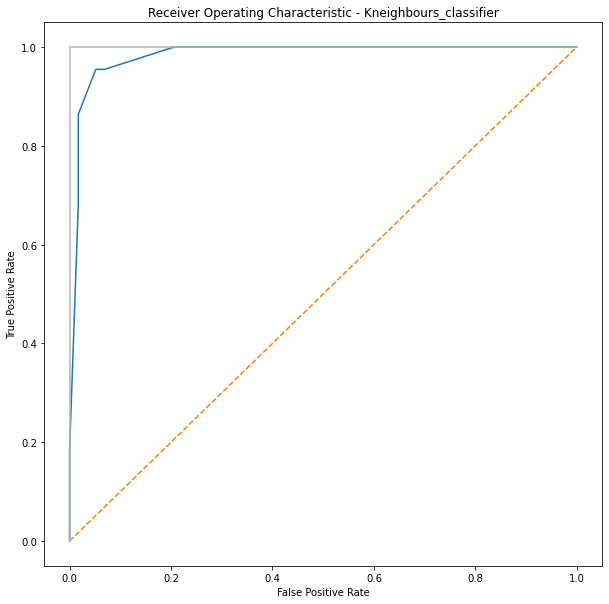

In [24]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Kneighbours_classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Making the Confusion Matrix**

In [25]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(Y_test,y_pred)
con_matrix

array([[55,  3],
       [ 1, 21]], dtype=int64)

<AxesSubplot:>

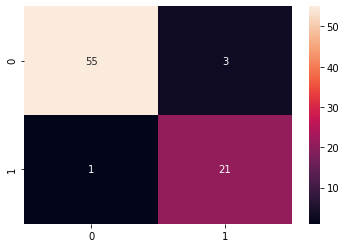

In [26]:
import seaborn as sns
sns.heatmap(con_matrix, annot=True)